# Assignment 5 
> Dominik Huffield <br>
CS 533 <br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics

In [2]:
articles = pd.DataFrame.from_records(
    ((f.parent.name, f.name, f.read_text(encoding='latin1'))
     for f in Path('bbc').glob('*/*.txt')),
    columns=['category', 'file', 'text']
)

In [3]:
articles.groupby('category')['file'].count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: file, dtype: int64

**The distribution of each categorty represented numerically**

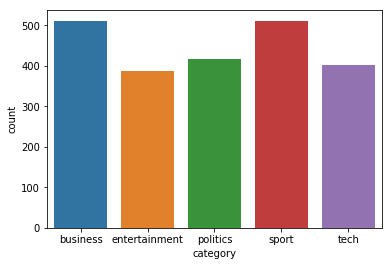

In [4]:
sns.countplot(x=articles['category'])

**The distribution of each categorty represented graphically**

In [5]:
category_dict = {'business':0, 'entertainment':1, 'politics':2, 'sport':3, 'tech':4}
articles['category_id'] = articles['category'].map(category_dict)
articles.head()

,category,file,text,category_id
0,business,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,0
1,business,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,0
2,business,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,0
3,business,004.txt,High fuel prices hit BA's profits\n\nBritish A...,0
4,business,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,0


In [6]:
X = articles['text']
y = articles['category_id']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Splitting into train and test sets having 20% sample test size

In [8]:
count_vect = CountVectorizer(stop_words='english')
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

In [9]:
tfidf_vect = TfidfVectorizer(stop_words='english')
X_train_tfi = tfidf_vect.fit_transform(X_train)
X_test_tfi = tfidf_vect.transform(X_test)

pd.DataFrame(X_train_tfi.toarray(), columns=tfidf_vect.get_feature_names()).head()

,00,000,0001,000bn,000m,000s,000th,001,001and,007,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.032992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Part 2: Classification

>Taining a model using Naive Bayes using Count Vectorization as data

In [10]:
nb_mod = MultinomialNB()
%time nb_mod.fit(X_train_count, y_train)

CPU times: user 12.1 ms, sys: 3.52 ms, total: 15.6 ms
Wall time: 12.5 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
y_pred_nb = nb_mod.predict(X_train_count)
metrics.accuracy_score(y_train, y_pred_nb)

0.9938202247191011

In [12]:
y_pred_nb = nb_mod.predict(X_test_count)
metrics.accuracy_score(y_test, y_pred_nb)

0.9730337078651685

>Taining a model using KNeighborsClassifier using TfidfVectorization as data

In [13]:
kn_mod = KNeighborsClassifier(n_neighbors=5)
%time kn_mod.fit(X_train_tfi, y_train)

CPU times: user 12.7 ms, sys: 1.14 ms, total: 13.8 ms
Wall time: 2.89 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_pred_kn = kn_mod.predict(X_train_tfi)
metrics.accuracy_score(y_train, y_pred_kn)

0.9578651685393258

In [15]:
y_pred_kn = kn_mod.predict(X_test_tfi)
metrics.accuracy_score(y_test, y_pred_kn)

0.9348314606741573

### Part 3: Clustering

<br>

>Building Kmeans model with 5 clusters

In [16]:
kmeans = KMeans(n_clusters=5, random_state=2)
%time kmeans.fit(X_train_tfi, y_train)

CPU times: user 2min 15s, sys: 583 ms, total: 2min 15s
Wall time: 52.3 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [17]:
y_pred_kmn = kmeans.predict(X_train_tfi)
metrics.accuracy_score(y_train, y_pred_kmn)

0.4134831460674157

In [18]:
y_pred_kmn = kmeans.predict(X_test_tfi)
metrics.accuracy_score(y_test, y_pred_kmn)

0.38202247191011235

In [19]:
ivd = {v: k for k, v in category_dict.items()}
kmn_df = pd.DataFrame(y_pred_kmn, columns=['pred_label'], index=y_test.index)

kmn_df['label'] = y_test

kmn_df['pred_label'].replace(ivd, inplace=True)
kmn_df['label'].replace(ivd, inplace=True)
# kmn_df.isnull().index
kmn_df.head()

,pred_label,label
209,business,business
174,sport,business
1816,tech,sport
1236,politics,politics
257,sport,business


In [20]:
kmn_df.groupby('pred_label').count()

,label
pred_label,
business,191
entertainment,65
politics,46
sport,36
tech,107


In [21]:
kmn_df.groupby('label')['pred_label']

In [22]:
km_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=tfidf_vect.get_feature_names()).rename(index=ivd)
# km2_centroids.sort(axis=1, inplace=True)
km_centroids.sum(axis=1)

business          9.113478
entertainment     9.189874
politics         10.152868
sport             9.418861
tech              8.842494
dtype: float64

/Users/dom/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


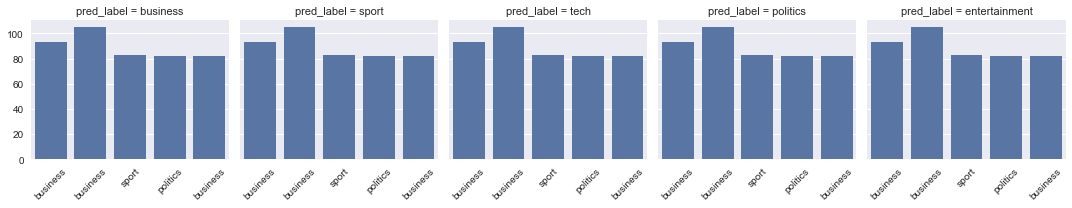

In [23]:
plt.style.use('seaborn')
g = sns.FacetGrid(kmn_df, col="pred_label", sharey=True)

axs =  g.map(sns.countplot,x=kmn_df['label'])
axs.set_xticklabels(kmn_df['label'], rotation=45)

plt.tight_layout()


**3. Did the clustering do a good job of finding the categories?** <br>
<br>


In [24]:
(kmn_df['label'] == kmn_df['pred_label']).mean()

0.38202247191011235

**Nope**

>Now for a model using 6 clusters

In [25]:
kmeans2 = KMeans(n_clusters=6, random_state=2)
%time kmeans2.fit(X_train_tfi, y_train)

CPU times: user 2min 28s, sys: 646 ms, total: 2min 29s
Wall time: 59.3 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [26]:
y2_pred_kmn = kmeans2.predict(X_test_tfi)
metrics.accuracy_score(y_test, y2_pred_kmn)

0.035955056179775284

In [27]:
km2_centroids = pd.DataFrame(kmeans2.cluster_centers_, columns=tfidf_vect.get_feature_names()).rename(index=ivd)
# km2_centroids.sort(axis=1, inplace=True)
km2_centroids.sum(axis=1)

business          8.889296
entertainment     9.921971
politics          9.402055
sport             9.438060
tech              8.772883
5                10.157400
dtype: float64

In [28]:
df = pd.DataFrame(X_train_tfi.toarray(), columns=tfidf_vect.get_feature_names(), index=y_train.index)
df2 = pd.DataFrame(X_test_tfi.toarray(), columns=tfidf_vect.get_feature_names(), index=y_test.index)

df = df.append(df2)
df.sort_index(inplace=True)

df['label'] = articles['category']
# df['label'].replace(ivd, inplace=True)

df = pd.DataFrame(df.groupby('label').sum())

for c in df.index:
    x = df.loc[c]
    m = df.drop(index=[c]).sum()
    x = pd.Series(x-m, name=c)
    print(x.nlargest(5))
    print('\n')


growth     12.563416
bank       11.874400
oil        11.842332
economy    11.107784
shares     10.481519
Name: business, dtype: float64


film        25.122077
band         9.381907
awards       8.800733
festival     8.698245
album        8.590072
Name: entertainment, dtype: float64


labour      23.414750
blair       19.989981
election    19.214979
party       17.449209
brown       11.078474
Name: politics, dtype: float64


cup        11.930865
england    11.322817
match      10.732589
injury     10.265478
chelsea     9.694675
Name: sport, dtype: float64


mobile        12.709096
users         12.092459
software      11.909935
technology    10.587027
microsoft      9.738070
Name: tech, dtype: float64




The top 5 tokens for each category where the value of the frequency of a token in one category minus sum of frequency of that same token in other category is maximized. This gives the most important features for our classifier.

In [29]:
df.loc['tech'].nlargest()

people        16.162652
mobile        15.082660
said          15.067310
technology    12.603071
users         12.412288
Name: tech, dtype: float64

The five largest valued tokens to identify something as tech related. This provides decent results but can be improved <br><br>

In [30]:
df.loc['tech'].subtract(df.drop(index=['tech']).sum()).nlargest()

mobile        12.709096
users         12.092459
software      11.909935
technology    10.587027
microsoft      9.738070
dtype: float64

By taking the scores of each word within a given label and subrtacting the combined score of that word under the other labels we will obtain words uniquely correlated to the label at hand. For example the words in our first set compared to the words in the second youll notice 'people' and 'said' were replaced with 'users' and 'microsoft'. This correlation filter allows for better feature selection. 

### Extra Credit

In [31]:
kmeans = KMeans(n_clusters=5)
isvd = TruncatedSVD(n_components=8)
new_X = isvd.fit_transform(X_train_tfi)
kmn = kmeans.fit(X_train_tfi)
# pd.DataFrame(kmn)
kmeans.labels_

array([0, 4, 3, ..., 3, 4, 1], dtype=int32)

In [37]:
pd.DataFrame(kmn)

ValueError: DataFrame constructor not properly called!

In [35]:
sns.pairplot(kmn)

TypeError: 'data' must be pandas DataFrame object, not: <class 'sklearn.cluster.k_means_.KMeans'>